Task 05: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
Dataset Link: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv('/content/bank-full.csv', delimiter=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
{col: df[col].unique() for col in df.columns}

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88]),
 'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 2143,    29,     2, ...,  8205, 14204, 16353]),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'day'

In [ ]:
# Function to calculate Gini index
def gini_index(column):
    #total number of instances
    total = len(column)

    # for no instances, return 0
    if total == 0:
        return 0

    # occurrences of each unique value
    counts = column.value_counts()

    # Gini index
    gini = 1 - sum((count / total) ** 2 for count in counts)

    return gini

# Gini index for each column
gini_indices = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        gini_indices[column] = gini_index(df[column])

# Print Gini indices for each column
for column, gini in gini_indices.items():
    print(f"Gini Index for {column}: {gini}")

Gini Index for job: 0.8532787710193471
Gini Index for marital: 0.5443820858052917
Gini Index for education: 0.6254299782444819
Gini Index for default: 0.03540325726230731
Gini Index for housing: 0.49376419509110625
Gini Index for loan: 0.26910792863267874
Gini Index for contact: 0.49336645229779863
Gini Index for month: 0.8341068061638672
Gini Index for poutcome: 0.31720517013714356
Gini Index for y: 0.20659872015928626


In [ ]:
# Target variable: 'y' (whether the customer subscribed or not)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
categorical_columns = df.select_dtypes(include=['object']).columns
data = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features and target
X = data.drop('y', axis=1)
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the decision tree classifier
#clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.33      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564

Confusion Matrix:
 [[11647   319]
 [ 1072   526]]


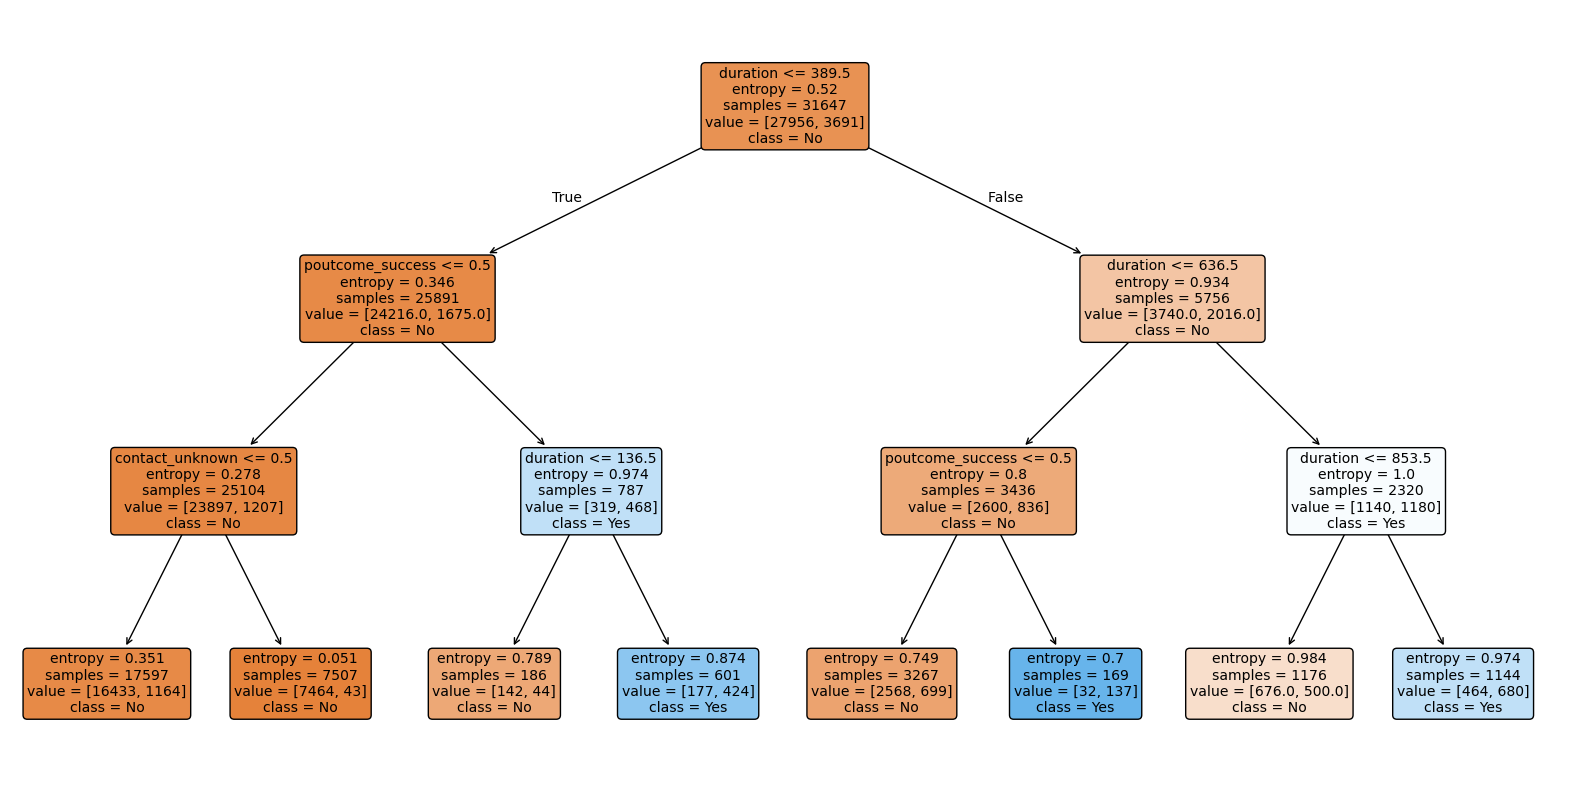

In [ ]:
# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [ ]:
# test_data = X_test.copy()
# test_data['target'] = y_test

# # Save the test data to CSV in /content/ directory
# test_data.to_csv('/content/test_data.csv', index=False)